In [39]:
# General data analysis/plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# warning
import warnings
warnings.filterwarnings("ignore")

# Exploration Data

In [40]:
df = pd.read_csv("/content/sample_data/data.csv", encoding= 'unicode_escape')

In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [42]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [43]:
df.shape

(541909, 8)

In [44]:
df.drop(['Description', 'CustomerID'], axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 24.8+ MB


In [46]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [47]:
df['year'] = df['InvoiceDate'].apply(lambda x : x.split(" ")[0].split("/")[2])
df['month'] = df['InvoiceDate'].apply(lambda x : x.split(" ")[0].split("/")[0])

In [48]:
countries = df['Country'].value_counts().sort_index()[:10].index.values.tolist()
mean_unit_price = [np.round(df[df['Country']==c]['UnitPrice'].sum(), 4)for c in countries ]
df_country = pd.DataFrame({'country' : countries,  'UnitPrice':mean_unit_price})

In [49]:
df_country

,country,UnitPrice
0,Australia,4054.75
1,Austria,1701.52
2,Bahrain,86.57
3,Belgium,7540.13
4,Brazil,142.60
5,Canada,910.58
6,Channel Islands,3738.55
7,Cyprus,3920.07
8,Czech Republic,88.15
9,Denmark,1266.95


# Data visualization

In [50]:
color = sns.color_palette()[4]

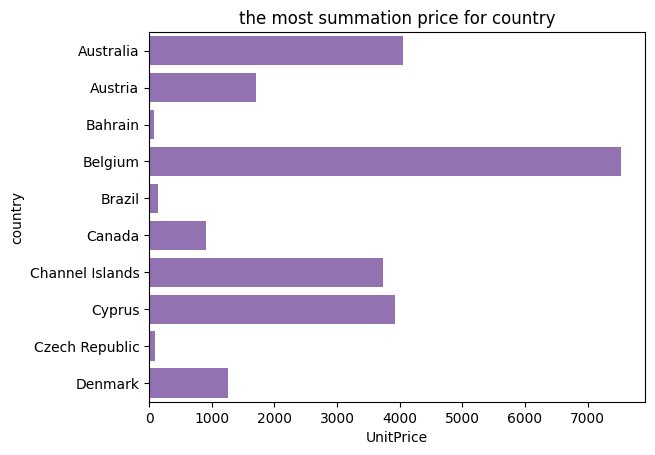

In [51]:
plt.title("the most summation price for country")
sns.barplot(data=df_country, y='country', x="UnitPrice", color=color);

In [52]:
months = df['month'].value_counts().index.values.tolist()
mean_unit_price = [np.round(df[df["month"]==month]['UnitPrice'].sum(), 4) for month in months ]
df_month = pd.DataFrame({'month' : months,  'UnitPrice':mean_unit_price})

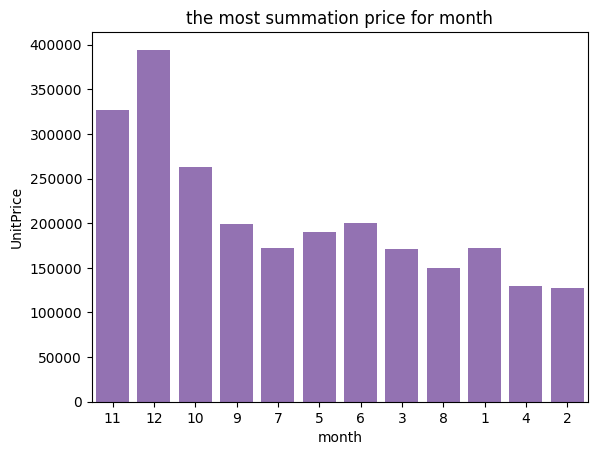

In [53]:
plt.title("the most summation price for month")
sns.barplot(data=df_month, x='month', y="UnitPrice", color=color);

Prepare data for modeling

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   Country      541909 non-null  object 
 6   year         541909 non-null  object 
 7   month        541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [55]:
df['month'], df['year'] = pd.to_numeric(df['month']), pd.to_numeric(df['year'])

In [56]:
df = df.loc[:, ["year", "month", "Quantity", "UnitPrice"]]


In [57]:
df.head()

,year,month,Quantity,UnitPrice
0,2010,12,6,2.55
1,2010,12,6,3.39
2,2010,12,8,2.75
3,2010,12,6,3.39
4,2010,12,6,3.39


In [58]:
df[['Quantity', 'UnitPrice']] = MinMaxScaler().fit_transform(df.iloc[:,2:])

In [59]:
df.head()

,year,month,Quantity,UnitPrice
0,2010,12,0.500037,0.221150
1,2010,12,0.500037,0.221167
2,2010,12,0.500049,0.221154
3,2010,12,0.500037,0.221167
4,2010,12,0.500037,0.221167


In [60]:
X = df.drop("UnitPrice", axis=1).values
y = df["UnitPrice"].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Build, compile, fit model

Use the Sequential API to build your model

Specify an optimizer (rmsprop or adam)

Set a loss function (MSE or MAE)

Fit the model (make a new variable called ‘history’ so you can evaluate the learning curves)

EarlyStopping callbacks to prevent overfitting (patience of 50)

In [62]:
# build the model!
model = Sequential()
model.add(Dense(10000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(5000, activation='relu'))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10000)             40000     
                                                                 
 dense_5 (Dense)             (None, 5000)              50005000  
                                                                 
 dense_6 (Dense)             (None, 2500)              12502500  
                                                                 
 dense_7 (Dense)             (None, 1)                 2501      
                                                                 
Total params: 62550001 (238.61 MB)
Trainable params: 62550001 (238.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [64]:
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5,
                   restore_best_weights = True)


In [65]:
# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=50,
                    batch_size=50,
                    verbose=1)

Epoch 1/50
8671/8671 [==============================] - 157s 17ms/step - loss: 128521.9062 - mae: 5.9191 - val_loss: 5.1238e-06 - val_mae: 0.0018
Epoch 2/50
8671/8671 [==============================] - 153s 18ms/step - loss: 1.0656e-05 - mae: 0.0014 - val_loss: 2.3789e-06 - val_mae: 7.4968e-04
Epoch 3/50
8671/8671 [==============================] - 153s 18ms/step - loss: 5.1626e-06 - mae: 8.8418e-04 - val_loss: 3.4907e-06 - val_mae: 0.0013
Epoch 4/50
8671/8671 [==============================] - 149s 17ms/step - loss: 4.7666e-06 - mae: 6.6522e-04 - val_loss: 2.1459e-06 - val_mae: 5.1115e-04
Epoch 5/50
8671/8671 [==============================] - 149s 17ms/step - loss: 4.6164e-06 - mae: 5.7076e-04 - val_loss: 1.8847e-06 - val_mae: 9.0525e-05
Epoch 6/50
8671/8671 [==============================] - 152s 18ms/step - loss: 4.5436e-06 - mae: 5.1670e-04 - val_loss: 2.2770e-06 - val_mae: 6.2645e-04
Epoch 7/50
8671/8671 [==============================] - 152s 18ms/step - loss: 4.5015e-06 - mae: 

Evaluate the Model
Learning curves
Scatterplots(Actual vs. Predicted)
Regression error metrics.

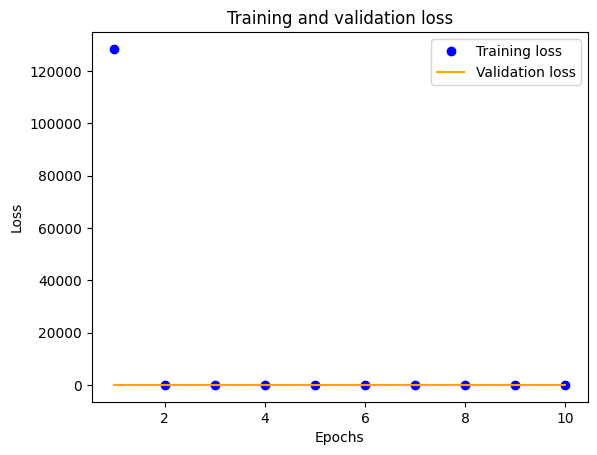

In [66]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

3387/3387 [==============================] - 8s 2ms/step


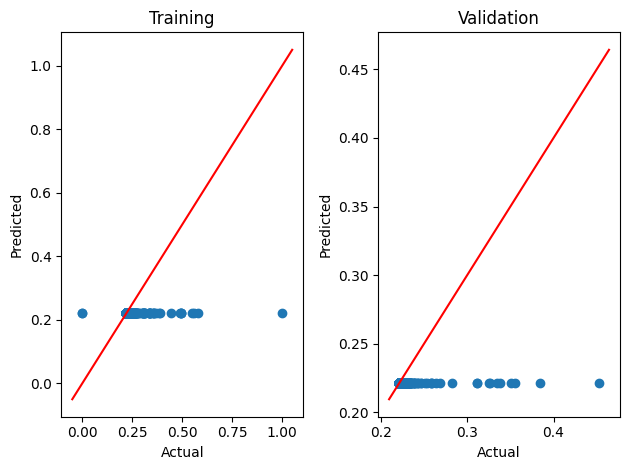

In [67]:
# scatterplot of actual vs. pred
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [68]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

13548/13548 [==============================] - 31s 2ms/step
9.502278008423024e-05
9.052557240181501e-05
